In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import datetime as dt
import re
import os
import pandas as pd


## Скачивание корпуса новостей с отраслевых сайтов

In [ ]:
# create new dataset to store parsed news
headings = []
leads = []
links = []
dates = []
news_df = pd.DataFrame({'headings': headings, 'leads': leads, 'links':links, 'dates': dates})

In [ ]:
news_df

,headings,leads,links,dates


In [ ]:
# перевод дат в нормальный формат
def convert_date(raw_date) : 
    date_split = raw_date.split(' ')
    day = date_split[0]
    if len(day) < 2 : day = '0' + day
    month = date_split[1]
    if 'янв' in month : month = '01'
    if 'фев' in month : month = '02'
    if 'мар' in month : month = '03'
    if 'апр' in month : month = '04'
    if 'мая' in month : month = '05'
    if 'июн' in month : month = '06'
    if 'июл' in month : month = '07'
    if 'авг' in month : month = '08'
    if 'сен' in month : month = '09'
    if 'окт' in month : month = '10'
    if 'ноя' in month : month = '11'
    if 'дек' in month : month = '12'
    year = date_split[2]
    converted_date = year + '.' + month + '.' + day
    return converted_date

In [ ]:
# functions 

# считываем код страницы
def parsing_pipe(url):
    req = requests.get(url)
    content = req.content
    soup = bs(content, 'html.parser')
    return soup


# парсим новости
def parse_link_vnedra(soup):
    titles = [i.get_text() for i in soup.find_all("h3", class_ = "entry-title mh-posts-list-title")]
    leads = [i.get_text() for i in soup.find_all("div", class_ = "mh-excerpt")]
    dates = [convert_date(i.get_text()) for i in soup.find_all("span", class_ = "entry-meta-date updated")]
#    for date in dates :
#      dates.append(convert_date(raw_dates))
    h3_tags = soup.find_all("h3", class_ = "entry-title mh-posts-list-title")
    links = []
    for tag in h3_tags : 
      link = tag.find('a', attrs={'rel':'bookmark'})['href']
      links.append(link)
    
    return titles, leads, links, dates

# идем по ссылке и собираем текст статьи - не используется
def parse_article(url):
    pagesoup = parsing_pipe(url)
    title = pagesoup.find("h1").get_text()
    text = " ".join([i.get_text() for i in pagesoup.find_all("p")])
    
    return title + '\n' + text + '\n\n'

In [ ]:
# vnedra.ru
i = 1
url_start = "https://www.vnedra.ru/novosti/page"

# идем по списку статей (по 10 на каждой странице) и сохраняем текст статей в файл
while i < 140 :
  print(i)
  url = url_start + "/"+str(i)+"/"
  pagecontent = parsing_pipe(url)
  titles, leads, links, dates = parse_link_vnedra(pagecontent)
  df = pd.DataFrame(
    {'headings': titles,
     'leads': leads,
     'links': links,
     'dates': dates
    })
  news_df = news_df.append(df)
  i = i + 1



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139


In [ ]:
news_df

,headings,leads,links,dates
0,"0,15% акций «Казатомпрома» проданы физически...",ФНК «Самрук-Казына» было размещено 385 000 акц...,https://www.vnedra.ru/novosti/015-akczij-kazat...,2020.06.11
1,Росгеология стала победителем 16 конкурсов п...,"Москва, 10 июня 2020 г. – АО «Росгеология» при...",https://www.vnedra.ru/novosti/rosgeologiya-sta...,2020.06.10
2,На Удокане установлена первая опора ЛЭП для ...,На Удокане приступили к строительству второй л...,https://www.vnedra.ru/novosti/na-udokane-ustan...,2020.06.10
3,Более миллиона тонн угля за месяц снова добы...,Представители компании «Южный Кузбасс» (структ...,https://www.vnedra.ru/novosti/bolee-milliona-t...,2020.06.10
4,Новую электрическую подстанцию запустили на ...,Место установки на руднике – седьмой горизонт....,https://www.vnedra.ru/novosti/novuyu-elektrich...,2020.06.09
...,...,...,...,...
4,Международный энергетический форум,"“Нельзя допустить того, чтобы вопросы энергети...",https://www.vnedra.ru/novosti/mezhdunarodnyj-e...,2010.10.14
5,Международный Форум «Нефть и газ Восточной С...,Международный Форум «Нефть и газ Восточной Сиб...,https://www.vnedra.ru/novosti/mezhdunarodnyj-f...,2010.10.11
6,Внимание!!! Подробная информация по 6-у горн...,6-й горнопромышленном форум «МАЙНЕКС Россия и ...,https://www.vnedra.ru/novosti/vnimanie-podrobn...,2010.09.15
7,Только проверенные технологии,Спустя шесть десятилетий после своего открыт...,https://www.vnedra.ru/tehnologii/proektirovani...,2010.09.08


In [ ]:
news_df.to_csv('vnedra_ru.csv', sep=';')

In [ ]:
# скачивание с minex-forum
headings = []
leads = []
#links = []
#dates = []
minex_news_df = pd.DataFrame({'headings': headings, 'leads': leads, 'links':links, 'dates': dates})
minex_news_df = pd.DataFrame({'headings': headings, 'leads': leads})


# парсим новости
def parse_link_minex(soup):
    titles = [i.get_text() for i in soup.find_all("h1", class_ = "entry-title")]
    leads = [i.get_text() for i in soup.find_all("div", class_ = "entry-content")]
    #dates = [i.attrs['datetime'] for i in soup.find_all("time", class_ = "entry-date published")]
#    for date in dates :
#      dates.append(convert_date(raw_dates))
    #h3_tags = soup.find_all("h3", class_ = "entry-title mh-posts-list-title")
    #links = []
    #for tag in h3_tags : 
    #  link = tag.find('a', attrs={'rel':'bookmark'})['href']
    #  links.append(link)
    
    return titles, leads



In [ ]:
i = 1
url_start = "https://www.minexforum.com/category/companies-2/"

while i < 70 :
  print(i)
  url = url_start + "page/"+str(i)+"/"
  pagecontent = parsing_pipe(url)
  titles, leads = parse_link_minex(pagecontent)
  df = pd.DataFrame(
    {'headings': titles,
     'leads': leads
    })
  minex_news_df = minex_news_df.append(df)
  i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [ ]:
minex_news_df

,headings,leads
0,Orsu Metals начнет добычу на Сергеевском в кон...,"15 июня 2020 года, NEDRADV. Orsu Metals полу..."
1,Полиметалл назвал основные направления экологи...,"10 июня 2020 года, NEDRADV. Хабаровский фили..."
2,Аукцион на Болотное золото в Чукотском АО не с...,"АНАДЫРЬ, 10 июн — РИА Новости/Прайм. Аукцион..."
3,БГК приступит к обустройству корпуса измельчен...,"3 июня 2020 года, NEDRADV. ООО «Байкальская ..."
4,Polymetal выпустил дополнительно 11 тыс. акций,"4 июня 2020 года, NEDRADV. Золотодобывающая ..."
5,Сафонихинское месторождение продадут за полмил...,"4 июня 2020 года, NEDRADV. Департамент по не..."
6,809 кг золота добыл «Прииск Соловьевский» за п...,"4 июня 2020 года, NEDRADV. АО «Прииск Соловь..."
7,Highland Gold продаст золотодобытчику Kinross ...,Золотодобытчик Highland Gold Mining (HGM) пр...
8,Petropavlovsk опроверг информацию о слиянии с ЮГК,"2 июня 2020 года, NEDRADV. Зарубежное издани..."
9,«Золото Камчатки» не допустит COVID-19 на Амет...,"ПЕТРОПАВЛОВСК-КАМЧАТСКИЙ, 2 июн — РИА Новост..."


In [ ]:
minex_news_df.to_csv('minex_news.csv', sep=';')

## Подключение к News API

In [ ]:
#API Ke at https://newsapi.org/: c2374266e1bb4bac8a65eb425011655f
# http://newsapi.org/v2/everything?country=russia&from=2020-06-01&to=2020-06-04&apiKey=c2374266e1bb4bac8a65eb425011655f

In [ ]:
pip install newsapi-python

### newsapi test

In [ ]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='c2374266e1bb4bac8a65eb425011655f')

# /v2/top-headlines
#top_headlines = newsapi.get_top_headlines(country='ru', category = 'business')
#top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                          category='business',
#                                          language='en',
#                                          country='us')
# /v2/everything
all_articles = newsapi.get_everything(sources='rbc',
                                      from_param='2020-06-04',
                                      to='2020-06-05', page=1)
#all_articles = newsapi.get_everything(domains='google.com',language='ru', page=4)

# /v2/sources
sources = newsapi.get_sources()

In [ ]:
for article in top_headlines['articles'] :
  print(article['title'])
  print(article['description'])
  print(article['publishedAt'])
  print(article['url'])

In [ ]:
len(all_articles['articles'])

0

In [ ]:
sources

In [ ]:
url = 'http://newsapi.org/v2/everything?domains=google.com&language=ru&apiKey=c2374266e1bb4bac8a65eb425011655f'
req = requests.get(url)
content = req.content




### newsapi prod

In [ ]:
# create new dataset to store parsed news
headings = []
leads = []
links = []
dates = []
current_news_df = pd.DataFrame({'headings': headings, 'leads': leads, 'links':links, 'dates': dates})

In [ ]:
from newsapi import NewsApiClient
from datetime import datetime, timedelta

end_date = (datetime.today()-timedelta(days = 30)).strftime("%Y-%m-%dT%H:%M:%S")
start_date = (datetime.today()-timedelta(days = 1)).strftime("%Y-%m-%dT%H:%M:%S")
#end_date = '2020-06-08T18:00:00'

count = 1
print('starting...')
while start_date > end_date :
  print('start cycle'+start_date)
  print('start cycle'+end_date)

  # Init
  newsapi = NewsApiClient(api_key='c2374266e1bb4bac8a65eb425011655f')
  news_page = 1
  while news_page < 6 :
    articles = newsapi.get_everything(sources='rbc, lenta', 
                                        language='ru',
                                        from_param = end_date,
                                        to=start_date, 
                                        sort_by = 'publishedAt',
                                        page=news_page)


    for article in articles['articles'] :
      print(count)
      #print(article['title'])
      #print(article['description'])
      print(article['publishedAt'])
      #print(article['url'])
      df = pd.DataFrame(
      {'headings': [article['title']],
        'leads': [article['description']],
        'links': [article['url']], 
        'dates': [article['publishedAt']], 
      })
      current_news_df = current_news_df.append(df)
      count += 1
      start_date = article['publishedAt'][0:-1]
    news_page += 1


Streaming output truncated to the last 5000 lines.
2020-05-31T21:03:05Z
1626
2020-05-31T21:02:30Z
1627
2020-05-31T21:00:04Z
1628
2020-05-31T20:33:00Z
1629
2020-05-31T20:25:47Z
1630
2020-05-31T20:25:47Z
1631
2020-05-31T20:22:02Z
1632
2020-05-31T20:18:22Z
1633
2020-05-31T20:02:13Z
1634
2020-05-31T19:58:00Z
1635
2020-05-31T19:50:07Z
1636
2020-05-31T19:31:32Z
1637
2020-05-31T19:31:32Z
1638
2020-05-31T19:21:05Z
1639
2020-05-31T19:03:00Z
1640
2020-05-31T18:58:00Z
1641
2020-05-31T14:29:47Z
1642
2020-05-31T14:23:52Z
1643
2020-05-31T14:23:10Z
1644
2020-05-31T14:19:00Z
1645
2020-05-31T14:11:42Z
1646
2020-05-31T14:11:06Z
1647
2020-05-31T14:08:00Z
1648
2020-05-31T14:02:33Z
1649
2020-05-31T13:59:46Z
1650
2020-05-31T13:52:30Z
1651
2020-05-31T13:29:42Z
1652
2020-05-31T13:23:00Z
1653
2020-05-31T13:18:17Z
1654
2020-05-31T13:08:00Z
1655
2020-05-31T13:06:02Z
1656
2020-05-31T13:05:29Z
1657
2020-05-31T12:57:43Z
1658
2020-05-31T12:37:45Z
1659
2020-05-31T12:37:45Z
1660
2020-05-31T12:34:42Z
1661
2020-05-31T07

KeyboardInterrupt: ignored

In [ ]:
len(set(current_news_df['leads']))

3917

In [ ]:
current_news_df.to_csv('current_news_1206.csv', sep=';')

## Извлечение именованных сущностей - natasha

In [ ]:
pip install natasha

     |████████████████████████████████| 34.4MB 1.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 7.1MB 40.8MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.0.2-cp36-none-any.whl size=25791 sha256=534213c9158a9132ca1c8e3d2088a718d76cccdad409e62e29034b9482233162
  Stored in directory: /root/.cache/pip/wheels/08/99/c0/5a5942f5b9567c59c14aac76f95a70bf11dccc71240b91ebf5
Successfully built intervaltree
  Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

In [ ]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(text)
doc

Doc(text='Посол Израиля на Украине Йоэль Лион признался, чт...)

In [ ]:
doc.segment(segmenter)
display(doc)
display(doc.sents[:2])
display(doc.tokens[:5])

Doc(text='Посол Израиля на Украине Йоэль Лион признался, чт..., tokens=[...], sents=[...])

[DocSent(stop=218, text='Посол Израиля на Украине Йоэль Лион признался, чт..., tokens=[...]),
 DocSent(start=219, stop=257, text='Свое заявление он разместил в Twitter.', tokens=[...])]

[DocToken(stop=5, text='Посол'),
 DocToken(start=6, stop=13, text='Израиля'),
 DocToken(start=14, stop=16, text='на'),
 DocToken(start=17, stop=24, text='Украине'),
 DocToken(start=25, stop=30, text='Йоэль')]

In [ ]:
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
display(doc.tokens[:5])

[DocToken(stop=5, text='Посол', id='1_1', head_id='1_7', rel='nsubj', pos='NOUN', feats=<Anim,Nom,Masc,Sing>),
 DocToken(start=6, stop=13, text='Израиля', id='1_2', head_id='1_1', rel='nmod', pos='PROPN', feats=<Inan,Gen,Masc,Sing>),
 DocToken(start=14, stop=16, text='на', id='1_3', head_id='1_4', rel='case', pos='ADP'),
 DocToken(start=17, stop=24, text='Украине', id='1_4', head_id='1_1', rel='nmod', pos='PROPN', feats=<Inan,Loc,Fem,Sing>),
 DocToken(start=25, stop=30, text='Йоэль', id='1_5', head_id='1_1', rel='appos', pos='PROPN', feats=<Anim,Nom,Masc,Sing>)]

In [ ]:
doc.tag_ner(ner_tagger)
display(doc.spans[:5])

[DocSpan(start=6, stop=13, type='LOC', text='Израиля', tokens=[...]),
 DocSpan(start=17, stop=24, type='LOC', text='Украине', tokens=[...]),
 DocSpan(start=25, stop=35, type='PER', text='Йоэль Лион', tokens=[...]),
 DocSpan(start=89, stop=106, type='LOC', text='Львовской области', tokens=[...]),
 DocSpan(start=152, stop=158, type='LOC', text='России', tokens=[...])]

In [ ]:
doc.spans[0]

DocSpan(start=6, stop=13, type='LOC', text='Израиля', tokens=[...])

In [ ]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года).'
markup = ner_tagger(text)
markup.print()

Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав
      LOC────    LOC──── PER───────                                   
 о решении властей Львовской области объявить 2019 год годом лидера 
                   LOC──────────────                                
запрещенной в России Организации украинских националистов (ОУН) 
              LOC─── ORG─────────────────────────────────────── 
Степана Бандеры. Свое заявление он разместил в Twitter. 11 декабря 
PER────────────                                ORG────             
Львовский областной совет принял решение провозгласить 2019 год в 
ORG──────────────────────                                         
регионе годом Степана Бандеры в связи с празднованием 110-летия со дня
              PER────────────                                         
 рождения лидера ОУН (Бандера родился 1 января 1909 года).
                 ORG                                      


In [ ]:
markup

NERMarkup(
    text='Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года).',
    spans=[Span(
         start=6,
         stop=13,
         type='LOC'
     ), Span(
         start=17,
         stop=24,
         type='LOC'
     ), Span(
         start=25,
         stop=35,
         type='PER'
     ), Span(
         start=89,
         stop=106,
         type='LOC'
     ), Span(
         start=152,
         stop=158,
         type='LOC'
     ), Span(
         start=159,
         stop=201,
         type='ORG'
     ), Span(
         start=202,
         stop=217,
         type='PER'
     ),

In [ ]:
for span in markup.spans :
  if span.type == 'ORG' :
    print(markup.text[span.start:span.stop])

Организации украинских националистов (ОУН)
Twitter
Львовский областной совет
ОУН


## Извлечение именованных сущностей - корпус отраслевых новостей


In [ ]:
news_df = pd.read_csv('vnedra_ru.csv', sep=';')

In [ ]:
minex_news_df = pd.read_csv('minex_news.csv', sep=';')

In [ ]:
news_df = news_df.append(minex_news_df)

In [ ]:
news_df.tail()

,Unnamed: 0,headings,leads,links,dates
823,7,Итоги форума МАЙНЕКС Центральная Азия-2017,8-й Горнопромышленный форум МАЙНЕКС Централь...,NaN,NaN
824,8,Горнопромышленный форум МАЙНЕКС Центральная Аз...,В Астане проходит горнопромышленный форум МА...,NaN,NaN
825,9,В «Казатомпроме» появился коммерческий директор,Председатель правления АО «НАК «Казатомпром»...,NaN,NaN
826,10,Areva прирастила запасы в Казахстане более чем...,Сегодня в Астане предправления АО «НАК «Каза...,NaN,NaN
827,11,ЛУКОЙЛ получил разрешение на продажу архангель...,Правительственная комиссия по иностранным ин...,NaN,NaN


In [ ]:
golden_orgs = []
for index, row in news_df.iterrows():
    article = row['headings']+". "+row['leads']
    natasha_markup = markup = ner_tagger(article)
    for span in natasha_markup.spans :
      if span.type == 'ORG':
        golden_orgs.append(markup.text[span.start:span.stop])
        print(markup.text[span.start:span.stop])




Streaming output truncated to the last 5000 lines.
АО «АрселорМиттал Темиртау
Дворце школьников
ОТ
АрселорМиттал
АО «АрселорМиттал Темиртау
КАНЕКС
КАНЕКС
АО «Хиагда»
MiningWorld Russia
АО «АрселорМиттал Темиртау
АрселорМиттал Темиртау
АрселорМиттал Темиртау
АО «АрселорМиттал Темиртау
АО «АрселорМиттал Темиртау
ГОРМАШ-2018
КАНЕКС
Темиртауский металлург
Micromine
MAXConference
Novotel  Москва Киевская
MAXConference
Novotel Москва Киевская
ЕЗ ОЦМ
АО «ЕЗ ОЦМ
АО «ЕЗ ОЦМ
АО «Екатеринбургский завод по обработке цветных металлов
Министерство внешней [
Полиметалл
Хабаровском филиале
АО «Полиметалл УК» (ПМУК ХФ)
Geobank
КАНЕКС
КАНЕКС
Пробирной палаты
ERG
Евразийской Группы
WorldSkills
КАНЕКС
Кузбасского государственного [
PALFINGER
Scania
СНГ
КАНЕКС
Nordic Minesteel Technologies Inc
СП
КАНЕКС
NMT
Департамента экологии и недропользования
Соколовско-Сарбайского горно-обогатительного производственного объединения
Евразийскую Группы (ERG)
Рудненской средней школе
Пермского государственного националь

In [ ]:
len(golden_orgs)

5945

In [ ]:
import collections
counter=collections.Counter(golden_orgs)
print(counter)


Counter({'Polymetal': 118, 'Petropavlovsk': 74, 'Nordgold': 57, 'ERG': 55, 'Металлоинвест': 50, 'Казатомпром': 48, 'Норникеля': 46, 'Polymetal Int': 46, 'АЛРОСА': 45, 'UC Rusal': 44, 'Норникель': 43, 'KAZ Minerals': 43, 'Северсталь': 40, 'УГМК': 37, 'МСФО': 34, 'АО «АрселорМиттал Темиртау': 33, 'Полюс': 33, 'Мечел': 31, 'Алроса': 30, 'АО «Полиметалл»': 30, 'En+': 26, 'Highland Gold': 25, 'ПАО «Северсталь»': 24, 'СУЭК': 23, 'ArcelorMittal': 23, 'Кредо-Диалог': 23, 'MiningWorld Russia': 23, 'ПАО «Полюс»': 21, 'ФАС': 21, 'РИА Новости/Прайм': 21, 'Centerra Gold Inc': 21, 'Eurasian Resources Group': 20, 'Высочайший': 20, 'Евразийской Группы (ERG)': 19, 'АО «ОГК Групп': 18, 'Eurasian Resources Group (ERG)': 18, 'Scania': 18, 'НЛМК': 18, 'КАНЕКС': 17, 'МАЙНЕКС': 17, 'ВТБ': 17, 'ОГК': 16, 'ГМК': 16, 'Конгресса': 16, 'ГМК «Норильский никель': 16, 'ММК': 16, 'Sandvik Construction': 16, 'АО «Алюминий Казахстана': 15, 'АО «НАК «Казатомпром»': 15, 'Аналитика Экспо': 14, 'АК «Алроса»': 14, 'Lydian A

In [ ]:
top_ner = dict(counter.most_common(50))

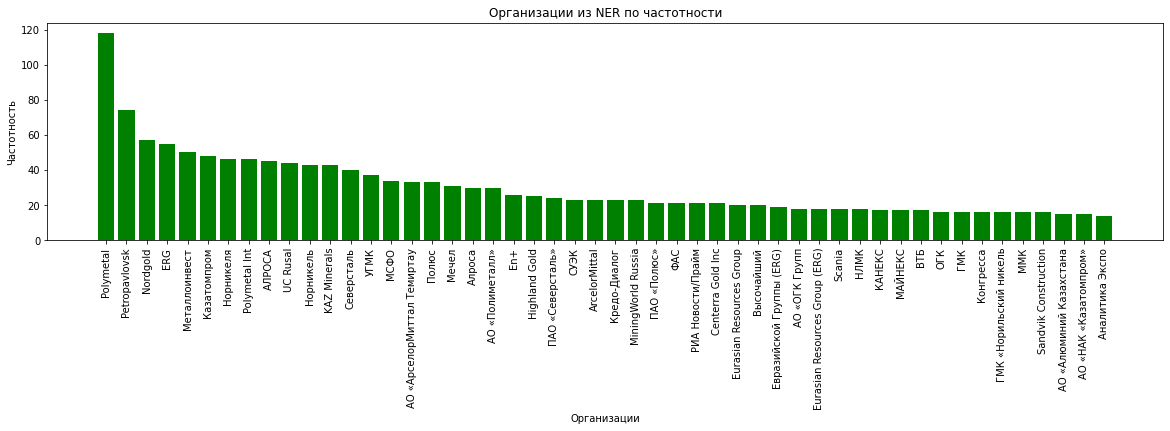

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*top_ner.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,4))
plt.bar(labels, values, color='green')
plt.title(f'Организации из NER по частотности')
plt.xlabel('Организации')
plt.ylabel('Частотность')
plt.xticks(rotation = '90')
plt.show()

In [ ]:
unique_golden_orgs = set(golden_orgs)

In [ ]:
len(unique_golden_orgs)

2595

In [ ]:
unique_golden_orgs

{'УГМК',
 'ILVA',
 'АО «Екатеринбургский завод по обработке цветных металлов» (АО «ЕЗ ОЦМ',
 'АО «Евроазиатская энергетическая корпорация',
 'Кыштымском машиностроительном объединении',
 'Правительство',
 'Glencore',
 'Евразийская Группа',
 'Региональной юниорной ГРК',
 'ИК «Арлан»)',
 'Шахтинская',
 'ООО «Рудник Валунистый',
 'КРЕДО ДАТ',
 'Эйр Астаны',
 'Темиртауский металлург',
 'Лебединском ГОК',
 'СУЗРК',
 'Центр Международной Торговли [',
 'Государственной корпорации «Росатом',
 'Узбекское ГП «Навоийский горно-металлургический комбинат» (НГМК)',
 'ТОСЭР «Краснотурьинск»',
 'Аметистовое',
 'Ракишева',
 'Евразийская группа (Eurasian Resources Group\xa0— ERG)',
 'ДЖО',
 'БЕЛАЗа',
 'Московской бирже',
 'RG Processing',
 'ТОО «Тарутинское»',
 'Управление по контролю за иностранными активами (OFAC)',
 'ООО «ТриАрк Майнинг»',
 'ОАО\xa0 «Зарубеж-Экспо»',
 'Норильского никеля',
 'Казатомпромом',
 'Новости Армении – NEWS.am',
 'Goldcorp',
 'Свердловский арбитраж',
 'Быстринского',
 'Resour

## Фильтрация новостей

### препроцессинг

In [ ]:
!pip install pymorphy2[fast]
import pymorphy2
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string

     |████████████████████████████████| 378kB 2.3MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=860283 sha256=7cb94ccd35a45461ea734f3895b20dc4dde3139d76b4b5e28b6a98762f4fbd20
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


- убрать цифры, пунктуацию, лемматизировать, токенизировать

In [ ]:
# функция лемматизации и препроцессинга

morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')
punctuation = string.punctuation + '«»–“’”№,'
numbers = '1234567890'
def preprocess_tokenize(text):
    
    text_preprocessed_tokenized = []
    
    #text = text.replace('\r', '').replace('\n', ' ')
    clean_words = [word.strip(punctuation) for word in word_tokenize(text)]
    clean_words = [word.strip(numbers) for word in clean_words]
    clean_words = [word.lower() for word in clean_words if word]
    clean_words = [word for word in clean_words if word not in russian_stopwords]
        
    clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        
    text_preprocessed_tokenized.extend(clean_lemmas)
    #print (text_preprocessed_tokenized)
    return text_preprocessed_tokenized


In [ ]:
all_news_train = pd.read_csv('all_news_train_v2.csv', sep=';')

In [ ]:
all_news_train['head_lead'] = all_news_train['headings'] + ' ' + all_news_train['leads'].str.replace('…', '')
all_news_train['head_lead'] = all_news_train['head_lead'].str.replace('\[читать далее\]', '')

In [ ]:
all_news_train = all_news_train.fillna(' ')

In [ ]:
for index, row in all_news_train.iterrows() :
  print(row['head_lead'])

  0,15% акций «Казатомпрома» проданы физическим лицам  ФНК «Самрук-Казына» было размещено 385 000 акций «Казатомпрома» среди физлиц. Это один из этапов по приватизации самого большого в мире изготовителя урана. ФНК «Самрук-Казына» на 
  Росгеология стала победителем 16 конкурсов по поисковым работам на ТПИ на сумму свыше 4 млрд рублей  Москва, 10 июня 2020 г. – АО «Росгеология» признано победителем 16 открытых конкурсов на проведение поисковых работ на твердые полезные ископаемые (ТПИ), проведенных территориальными подразделениями 
  На Удокане установлена первая опора ЛЭП для энергоснабжения будущего металлургического производства  На Удокане приступили к строительству второй линии ВЛ 220 кВ. – на площадке установлена первая опора. Новая высоковольтная линия электропередачи (в двухцепном исполнении) протянется на 
  Более миллиона тонн угля за месяц снова добыто на «Южном Кузбассе»  Представители компании «Южный Кузбасс» (структурное подразделение Группы компаний «Мечел») сообщили, чт

In [ ]:
all_news_train.category.value_counts() 

1    2104
0    1999
Name: category, dtype: int64

### обучение классификатора

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
vectorizer = TfidfVectorizer(tokenizer=preprocess_tokenize)
bow = vectorizer.fit_transform(all_news_train.head_lead)

X_train, X_test, y_train, y_test = train_test_split(bow, all_news_train.category)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       488
           1       0.98      0.97      0.98       538

    accuracy                           0.98      1026
   macro avg       0.98      0.98      0.98      1026
weighted avg       0.98      0.98      0.98      1026



In [ ]:
new_vector = vectorizer.transform(['ООО «Байкальская горная компания» (БГК) в конце июня 2020 года планирует приступить к монтажу оборудования на площадке строительства горно-металлургического комбината «Удокан» в Забайкальском крае. Как сообщает компания, первая партия закладных деталей для установки шаровых мельниц поступила на Удоканское месторождение еще в феврале 2020 года. Согласно проекту, в рамках первой очереди '])

In [ ]:
clf.predict(new_vector)


array([1])

In [ ]:
clf.predict_proba(new_vector)

array([[0.07180836, 0.92819164]])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


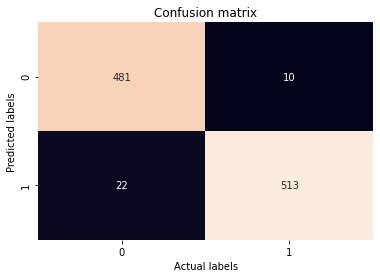

In [ ]:
categories = [0, 1]
sns.heatmap(data=confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
# Translation dict from vocab indexes to words
index_to_word = {
    ind: word
    for (word, ind)
    in vectorizer.vocabulary_.items()
    }

def get_words_from_idx(indexes):
    """Return a list of words from indexes."""
    return [index_to_word[index] for index in indexes]

def plot_top_features(top_or_bottom, max_top_feat):
    """Plot a bar chart of top features for a given label."""
    if top_or_bottom == 'top' :
      idx_coef_list = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=True)
    else :
      idx_coef_list = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=False)
    idx, coef = zip(*idx_coef_list)
    top_words = get_words_from_idx(idx[:max_top_feat])
    plt.figure(figsize=(16,4))
    plt.bar(top_words, coef[:max_top_feat], color='blue')
    plt.title(f'Наиболее значимые признаки')
    plt.xlabel('Признаки')
    plt.ylabel('Коэффициенты')
    plt.xticks(rotation = '90')
    plt.show()

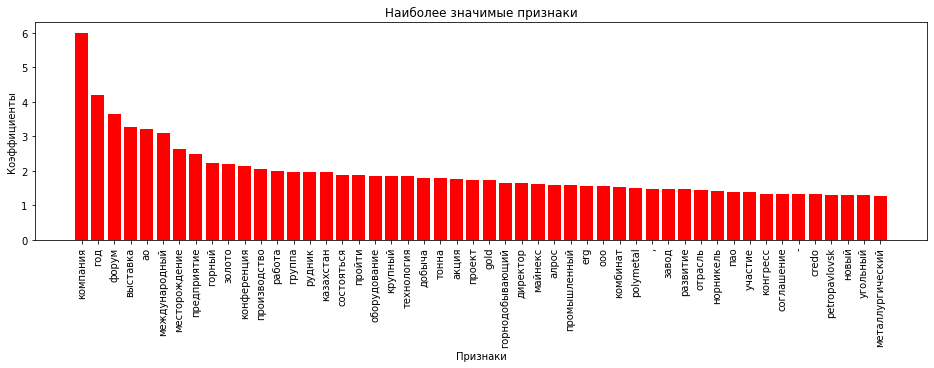

In [ ]:
plot_top_features('top', 50)

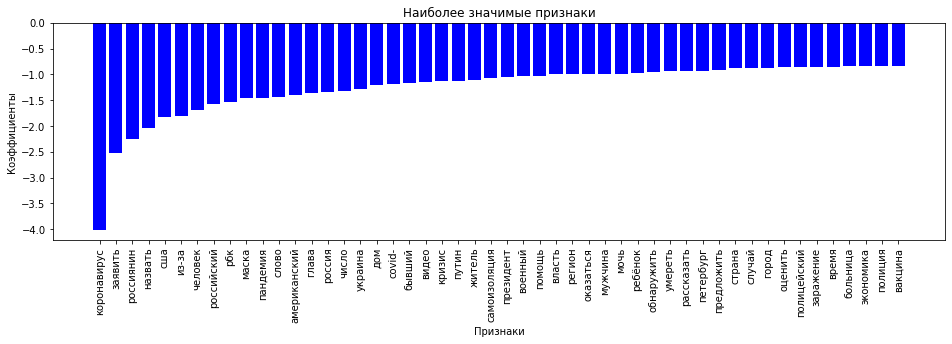

In [ ]:
plot_top_features('bottom', 50)

### топ-признаки классификатора

In [ ]:
index_to_word = {
    ind: word
    for (word, ind)
    in vectorizer.vocabulary_.items()
    }

In [ ]:
# первые n коэффициентов
top_features = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=True)[:200]
for index, value in top_features:
  print(index)
  print(index_to_word[index])

5348
компания
3249
год
2991
выставка
12137
форум
6219
международный
1682
ао
6267
месторождение
8932
предприятие
5460
конференция
3330
горный
9537
работа
3463
группа
5643
крупный
9313
производство
4515
золото
11387
технология
10057
рудник
10799
состояться
9321
пройти
9289
проект
4950
казахстан
9595
развитие
7312
оборудование
11451
тонна
4202
завод
3315
горнодобывающий
1
,
3782
добыча
7559
ооо
5324
комбинат
3736
директор
6029
майнекс
1573
алрос
929
polymetal
505
gold
7839
отрасль
1529
акция
6340
миллион
7181
норникель
9353
промышленный
7980
пао
9352
промышленность
6271
металл
11725
уголь
9677
рамка
5391
конгресс
11975
участие
6282
металлургический
420
erg
11726
угольный
10051
руда
914
petropavlovsk
16
-
1700
апрель
7502
октябрь
10662
совет
334
credo
12589
шахта
1503
актив
9284
продукция
12752
эксплуатация
6255
мероприятие
6337
миллиард
781
mining
3257
гок
9223
проведение
9249
программа
7148
новый
10109
рынок
34
-й
4900
итог
4945
казатомпром
7190
ноябрь
10457
система
5360
комплекс
1743
ар

### фильтрация новостей на обученном классификаторе

In [ ]:
filtered_news = ''

In [ ]:
news_df = pd.read_csv('vnedra_ru.csv', sep=';')

In [ ]:
from datetime import datetime, timedelta

end_date = (datetime.today()-timedelta(days = 8)).strftime("%Y.%m.%dT%H:%M:%S")
start_date = datetime.today().strftime("%Y-%m-%dT%H:%M:%S")

filtered_news = news_df[news_df.dates > end_date]

In [ ]:
filtered_news

,Unnamed: 0,headings,leads,links,dates
0,0,"0,15% акций «Казатомпрома» проданы физически...",ФНК «Самрук-Казына» было размещено 385 000 акц...,https://www.vnedra.ru/novosti/015-akczij-kazat...,2020.06.11


In [ ]:
current_news_df = pd.read_csv('current_news_1206.csv', sep=';')
current_news_df['head_lead'] = current_news_df['headings'] + ' ' + current_news_df['leads']
current_news_df.head()

,Unnamed: 0,headings,leads,links,dates,head_lead
0,0,Глава Минздрава допустил «плавающий» режим огр...,"Режим ограничений, введенных из-за пандемии ко...",https://www.rbc.ru/rbcfreenews/5ee2841d9a79477...,2020-06-11T19:39:44Z,Глава Минздрава допустил «плавающий» режим огр...
1,0,Глава Минздрава допустил «плавающий» режим огр...,"Режим ограничений, введенных из-за пандемии ко...",https://www.rbc.ru/rbcfreenews/5ee2841d9a79477...,2020-06-11T19:39:44Z,Глава Минздрава допустил «плавающий» режим огр...
2,0,Оператор открыл продажу билетов на поезда в Кр...,Открылась продажа билетов на поезда по новым н...,https://www.rbc.ru/rbcfreenews/5ee281cc9a79477...,2020-06-11T19:35:21Z,Оператор открыл продажу билетов на поезда в Кр...
3,0,В России разбился легкомоторный самолет,Легкомоторный самолет разбился вблизи села Сас...,https://lenta.ru/news/2020/06/11/plane/,2020-06-11T19:25:00Z,В России разбился легкомоторный самолет Легком...
4,0,Адвоката Скрыпника проверят на причастность к ...,"По версии следствия, Константин Скрыпник мог и...",https://www.rbc.ru/society/11/06/2020/5ee26bfa...,2020-06-11T19:18:08Z,Адвоката Скрыпника проверят на причастность к ...


In [ ]:
current_news_df = current_news_df.fillna(' ')


In [ ]:
for index, row in current_news_df.iterrows():
  #if row['head_lead'] == ' ' : continue
  #print(preprocess_tokenize(row['head_lead']))
  str1 = ' '.join(preprocess_tokenize(row['head_lead']))
  #break
  #vector = vectorizer.transform([row['head_lead']])
  vector = vectorizer.transform([str1])
  #print(clf.predict_proba(vector)[0][0])
  if clf.predict_proba(vector)[0][0] < 0.4 :
  #if clf.predict(vector) == [1] :
    print(row['headings'])
    filtered_news = filtered_news.append(row)
    #filtered_news.append(
    #    {'headings': row['headings'], 
    #     'leads': row['leads'], 
    #     'links': row['links'], 
    #     'dates': row['dates'], 
    #     'head_lead': row['head_lead']}, ignore_index=True)

Самые дорогие компании мира установили исторический рекорд
Губернатор Ростовской области представил итоги работы за 2019 год
Экс-глава «РусГидро» вошел в совет директоров Segezha Group Евтушенкова
Эксперты нашли проблемы с безопасностью хранилища «Норникеля» в 2018 году
Комбинат UC Rusal остался без поставок из-за разрушения железной дороги
На многомиллиардном рынке Петербурга готовится крупная сделка
Готовящаяся к банкротству американская компания взлетела в цене
Российский регион удвоил экспорт масложировой продукции
«Газпром» заключил крупнейший контракт на поставку газа в России
Исполнительный директор ivi проработал в компании всего месяц
Совет директоров «Роснефти» избрал председателя
Новый владелец Эльги вложит ₽130 млрд для увеличения добычи в 10 раз
Новый владелец Эльги вложит ₽130 млрд для увеличения добычи в 10 раз
Ростехнадзор назвал еще одну возможную причину аварии в Норильске
Владелец «Норникеля» взял все расходы по устранению аварии на себя
Продавшая свой бренд Apple ко

In [ ]:
filtered_news

,Unnamed: 0,headings,leads,links,dates
0,0,"0,15% акций «Казатомпрома» проданы физически...",ФНК «Самрук-Казына» было размещено 385 000 акц...,https://www.vnedra.ru/novosti/015-akczij-kazat...,2020.06.11


### One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(golden_news)
clf = OneClassSVM(gamma='auto').fit(bow)
bow_current = vectorizer.fit_transform(current_news)
clf.predict(bow)

array([-1,  1,  1, ..., -1, -1,  1])

## Классификация на основе NER

In [ ]:
for index, row in current_news_df.iterrows():
  str1 = ' '.join(preprocess_tokenize(row['head_lead']))
  for org in top_ner.keys() :

    if org in str1 :
      print(row['headings'])
    if org in row['head_lead'] :
      print(row['headings'])



ФАС отказала «Яндексу» в покупке агрегатора такси «Везет»
«Норникель» привел доказательства своевременного информирования об аварии
Эксперты нашли проблемы с безопасностью хранилища «Норникеля» в 2018 году
Комбинат UC Rusal остался без поставок из-за разрушения железной дороги
Власти поручили «дочке» «Норникеля» проверить все резервуары после аварии
Власти поручили «дочке» «Норникеля» проверить все резервуары после аварии
Начальнику цеха ТЭЦ предъявили обвинение по делу об аварии в Норильске
Новый владелец Эльги вложит ₽130 млрд для увеличения добычи в 10 раз
Новый владелец Эльги вложит ₽130 млрд для увеличения добычи в 10 раз
Минэнерго и ФАС выступили против снижения тарифов «Транснефти» и РЖД
ЦБ не нашел угрозы инвестклимату в оспаривании ФАС сделки на $1,45 млрд
ЦБ не нашел угрозы инвестклимату в оспаривании ФАС сделки на $1,45 млрд
ВТБ запустит экокарту и геймификацию по очистке водоемов
Владелец «Норникеля» взял все расходы по устранению аварии на себя
Что случилось за ночь. Главн

In [ ]:
top_ner.keys()

dict_keys(['Polymetal', 'Petropavlovsk', 'Nordgold', 'ERG', 'Металлоинвест', 'Казатомпром', 'Норникеля', 'Polymetal Int', 'АЛРОСА', 'UC Rusal', 'Норникель', 'KAZ Minerals', 'Северсталь', 'УГМК', 'МСФО', 'АО «АрселорМиттал Темиртау', 'Полюс', 'Мечел', 'Алроса', 'АО «Полиметалл»', 'En+', 'Highland Gold', 'ПАО «Северсталь»', 'СУЭК', 'ArcelorMittal', 'Кредо-Диалог', 'MiningWorld Russia', 'ПАО «Полюс»', 'ФАС', 'РИА Новости/Прайм', 'Centerra Gold Inc', 'Eurasian Resources Group', 'Высочайший', 'Евразийской Группы (ERG)', 'АО «ОГК Групп', 'Eurasian Resources Group (ERG)', 'Scania', 'НЛМК', 'КАНЕКС', 'МАЙНЕКС', 'ВТБ', 'ОГК', 'ГМК', 'Конгресса', 'ГМК «Норильский никель', 'ММК', 'Sandvik Construction', 'АО «Алюминий Казахстана', 'АО «НАК «Казатомпром»', 'Аналитика Экспо'])